<a href="https://colab.research.google.com/github/jbae99/CS3091_fits_data/blob/assignment_3/DataSciTopics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [2]:
!pip install 'astrodendro'
!pip install 'aplpy'
!pip install 'wcsaxes'
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.wcs import WCS
from astropy.wcs.wcsapi import SlicedLowLevelWCS
import astrodendro 
from astrodendro import Dendrogram
from astrodendro import DendrogramPlotter
import aplpy 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 13.6 MB/s 
  Created wheel for astrodendro: filename=astrodendro-0.2.0-py3-none-any.whl size=3160582 sha256=5af7ef1b2a312edf94b0a3fa486af64630e271e09b88eb8e904f2909a6e9e402
  Stored in directory: /root/.cache/pip/wheels/70/dc/d0/d75a205319bc1be59adb997eea017aad751dcdddf94b72fb31
Successfully built astrodendro
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 378 kB 34.0 MB/s 
     |████████████████████████████████| 1.1 MB 53.1 MB/s 
     |████████████████████████████████| 1.3 MB 50.1 MB/s 
     |████████████████████████████████| 198 kB 11.9 MB/s 
  Created wheel for pyregion: filename=pyregion-2.1.1-cp37-cp37m-linux_x86_64.whl size=307701 sha256=1ef4a884a11d58230ec99188e50797f75da4701f8eac7548dad593d

In [31]:
data_path = '/content/gdrive/MyDrive/Topics Data/cleanimage.G10.99_Feather_SiO.image.fits'
data_path_2 = '/content/gdrive/MyDrive/Topics Data/cleanimage.G10.99.SiO.12m.7m.combined.image.mom0.fits'
dendro_path = '/content/gdrive/MyDrive/Topics Data/new_dendro.fits'
special_dendro_path = '/content/gdrive/MyDrive/Topics Data/new_special_dendro.fits'



def createMultiImage(plotData, noiseThresh):
  dataSlice1 = plotData[0,:,:]
  dataSlice2 = plotData[100,:,:]
  data = plotData.sum(axis = 0)
  print(f'Shape of plotted data: {data.shape}')

  plt.style.use(astropy_mpl_style)
  fig, axs = plt.subplots(2, 2)
  axs[0,0].imshow(data, cmap = mpl.cm.PuOr, vmin = noiseThresh)
  axs[0,1].hist(data, range = (noiseThresh, data.max()))
  axs[1,0].hist(dataSlice1)
  axs[1,1].hist(dataSlice2)
  plt.show()

def createImage(plotData, noiseThresh):
  dataSlice = plotData[0,0,:,:]


  plt.style.use(astropy_mpl_style)
  plt.imshow(dataSlice, cmap = mpl.cm.PuOr, vmin = noiseThresh)

  plt.show()
  

def printSummary(data):
  print(f'\nSize: {data.size} \nShape: {data.shape} \nMin: {data.min()} \nMax: {data.max()} \nMean: {np.mean(data)} \nMedian: {np.median(data)} \nStandard Dev: {np.std(data)} \nFifth Percentile: {np.percentile(data, 5)} \nNintieth Percentile: {np.percentile(data, 95)}')

def calcNoise(data):
  resizedData = data[0,0,300:400,200:300]
  return np.std(resizedData)

def createAndSaveDendro(data, noiseThresh):
  dendro = Dendrogram.compute(data, min_value = noiseThresh, verbose = True)
  dendro.save_to(dendro_path)

  specialDendro = Dendrogram.compute(data, min_value = noiseThresh, min_delta = 1, min_npix = 5, verbose = True)
  specialDendro.save_to(special_dendro_path)

def viewDendro():
  dendro = Dendrogram.load_from(dendro_path)
  v = dendro.viewer()
  v.show()

def viewContour(data, hdul, noiseThresh):
  wcs = WCS(hdul[0].header)
  wcs = wcs.sub(2)

  #print(wcs)

  dendro = Dendrogram.load_from(dendro_path)

  mask = np.zeros(data.shape, dtype = bool)

  for leaf in dendro.leaves:
   mask = mask | leaf.get_mask()
  
  mask_hdu = fits.PrimaryHDU(mask.astype('short'))
  #print(repr(mask_hdu.header))

  fig = aplpy.FITSFigure(hdul[0], figsize=(8,6))
  fig.show_colorscale(cmap='Blues', vmax = noiseThresh)
  fig.show_contour(data, colors = 'red', linewidths=0.5, slices = [10], dimensions = [0,1], levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


(1, 1, 512, 512) 
 (1, 1, 512, 512)


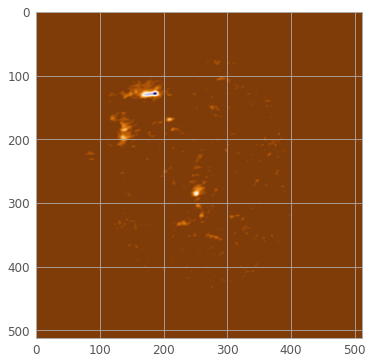

indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not

INFO: Setting slices=[0, 0] [aplpy.core]


INFO:astropy:Auto-setting vmin to -1.167e-01
INFO:astropy:Setting slices=[0, 0]


INFO: Auto-setting vmin to -1.167e-01 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


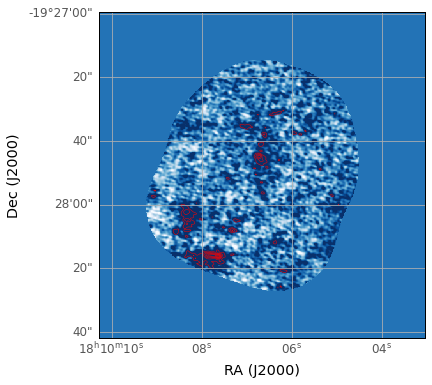

In [32]:
def main():
  
  hdul =   fits.open(data_path)
  hdul2 = fits.open(data_path_2)
  ##hdul.info()
  
  ##hdr = hdul[0].header

  ##print(repr(hdr))

  data = hdul2[0].data
  ##print(repr(hdul2[0].header))
  print(f'{data.shape} \n {hdul2[0].shape}')
  ##printSummary(data)

  noiseThresh = calcNoise(data)
  
  createImage(data, noiseThresh)

  ##createAndSaveDendro(slicedData, noiseThresh)

  ##viewDendro()

  viewContour(data, hdul2, noiseThresh)

  
if __name__ == "__main__":
  main()